In [1]:
import pandas as pd

points = []
points.append(pd.Series(data={'name': 'Oregon', 'PF': 373, 'PA': 173}))
points.append(pd.Series(data={'name': 'Indiana', 'PF': 454, 'PA': 176}))

In [2]:
data = \
"""SMU	7	0	10	1	432	231	5-1	5-0	Won 8
Clemson	7	1	9	2	414	242	5-1	4-0	Won 3
Miami (FL)	6	1	10	1	492	245	6-0	4-1	Won 1
Louisville	5	3	7	4	398	265	4-2	3-2	Won 1
Georgia Tech	5	3	7	4	307	254	5-0	1-3	Won 2
Syracuse	4	3	8	3	349	306	5-1	3-2	Won 2
Duke	4	3	8	3	299	249	5-1	3-2	Won 2
Pittsburgh	3	4	7	4	359	287	5-2	2-2	Lost 4
North Carolina	3	4	6	5	358	303	3-3	3-2	Lost 1
Boston College	3	4	6	5	317	266	5-1	1-4	Won 1
Virginia Tech	3	4	5	6	319	256	3-2	2-4	Lost 3
Virginia	3	4	5	6	255	308	2-4	3-2	Lost 2
California	2	5	6	5	307	228	4-3	2-2	Won 1
NC State	2	5	5	6	315	336	4-3	1-2	Lost 2
Wake Forest	2	5	4	7	291	367	1-5	3-2	Lost 3
Stanford	2	6	3	8	243	370	2-4	1-4	Lost 1
Florida St.	1	7	2	9	174	305	2-4	0-4	Won 1"""

In [3]:
data += """Iowa St.	6	2	9	2	345	214	5-1	4-1	Won 2
BYU	6	2	9	2	339	223	4-1	5-1	Lost 2
Arizona St.	6	2	9	2	336	251	6-0	3-2	Won 4
Colorado	6	2	8	3	362	264	4-1	4-2	Lost 1
Kansas St.	5	3	8	3	336	234	5-1	3-2	Won 1
Texas Tech	5	3	7	4	411	399	4-2	3-2	Won 1
TCU	5	3	7	4	381	304	4-2	3-2	Won 2
Baylor	5	3	7	4	371	286	4-1	3-3	Won 5
West Virginia	5	3	6	5	327	321	3-4	3-1	Won 1
Kansas	4	4	5	6	339	267	4-2	1-4	Won 3
Cincinnati	3	5	5	6	289	275	3-2	2-4	Lost 4
Houston	3	5	4	7	150	245	3-3	1-4	Lost 2
UCF	2	6	4	7	351	295	3-3	1-4	Lost 2
Arizona	2	6	4	7	254	332	3-3	1-4	Lost 1
Utah	1	7	4	7	255	234	2-4	2-3	Lost 7
Oklahoma St.	0	8	3	8	326	375	2-4	1-4	Lost 8"""

In [4]:
lines = data.split('\n')
for line in lines:
    items = line.split('\t')
    points.append(pd.Series(data={'name': items[0], 'PF': items[5], 'PA': items[6]}))

df = pd.DataFrame(data=points)
df['PF'] = df['PF'].astype(float)
df['PA'] = df['PA'].astype(float)

In [5]:
import numpy as np

NUMERATOR = 2.37

df['numerator'] = df['PF'].pow(NUMERATOR)
df['denominator'] = df['PF'].pow(NUMERATOR) + df['PA'].pow(NUMERATOR)
df['expectation'] = df['numerator']/df['denominator']

In [6]:
df.sort_values(ascending=False, by='expectation').head(n=5)

,name,PF,PA,numerator,denominator,expectation
1,Indiana,454.0,176.0,1.982542e+06,2.192371e+06,0.904291
0,Oregon,373.0,173.0,1.244371e+06,1.445822e+06,0.860667
4,Miami (FL),492.0,245.0,2.398597e+06,2.858137e+06,0.839217
2,SMU,432.0,231.0,1.762368e+06,2.162092e+06,0.815122
3,Clemson,414.0,242.0,1.593275e+06,2.039591e+06,0.781174


<Axes: xlabel='PF', ylabel='PA'>

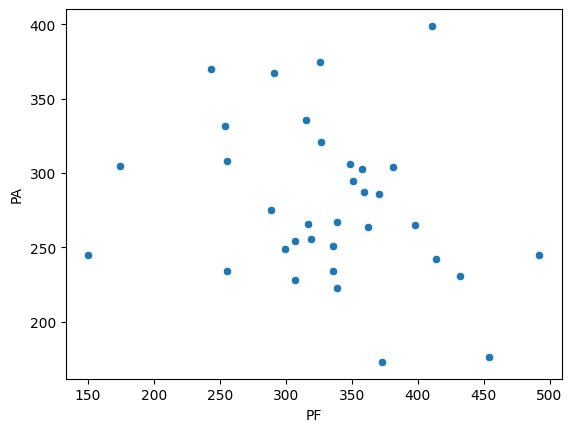

In [7]:
from seaborn import scatterplot
scatterplot(data=df, x='PF', y='PA', )